# Variant 3
`n = 8 => (8 + 4) % 5 + 1 = 3`

## Exercise 1
*Завдання*: Виведіть перші 8 рядків набору даних.

In [172]:
import pandas as pd

df = pd.read_csv('./NationalNames.csv')
df[:8]

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414


## Exercise 2
*Завдання*: Вивести останні 8 рядків набору даних.

In [173]:
df.tail(8)

,Id,Name,Year,Gender,Count
1825425,1825426,Zo,2014,M,5
1825426,1825427,Zyeir,2014,M,5
1825427,1825428,Zyel,2014,M,5
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


## Exercise 4
*Завдання*: Отримайте загальну інформацію про дані у наборі даних.

In [174]:
df.describe()

,Id,Year,Count
count,1.825433e+06,1.825433e+06,1.825433e+06
mean,9.127170e+05,1.972620e+03,1.846879e+02
std,5.269573e+05,3.352891e+01,1.566711e+03
min,1.000000e+00,1.880000e+03,5.000000e+00
25%,4.563590e+05,1.949000e+03,7.000000e+00
50%,9.127170e+05,1.982000e+03,1.200000e+01
75%,1.369075e+06,2.001000e+03,3.200000e+01
max,1.825433e+06,2.014000e+03,9.968000e+04


## Exercise 5
*Завдання*: Знайдіть кількість унікальних імен у наборі даних.

In [175]:
df['Name'].nunique()

93889

## Exercise 6
*Завдання*: Обчисліть кількість унікальних жіночих та чоловічих імен у цілому наборі даних.

In [176]:
df.groupby(['Gender'])['Name'].nunique()

Gender
F    64911
M    39199
Name: Name, dtype: int64

## Exercise 7
*Завдання*: Знайдіть 5 найпопулярніших чоловічих імен у 2010 році.

In [177]:
df[(df['Gender'] == 'M') & (df['Year'] == 2010)].sort_values(by=['Count'], ascending=False)[:5]

,Id,Name,Year,Gender,Count
1677392,1677393,Jacob,2010,M,22082
1677393,1677394,Ethan,2010,M,17985
1677394,1677395,Michael,2010,M,17308
1677395,1677396,Jayden,2010,M,17152
1677396,1677397,William,2010,M,17030


## Exercise 8
*Завдання*: Знайдіть найпопулярніше ім’я за результатами одного року (ім’я, для якого `Count` максимальне)

In [178]:
result_row = df.sort_values(by=['Count'], ascending=False)[:1]
print(f"The name is {result_row.iat[0, 1]} in {result_row.iat[0, 2]}")

The name is Linda in 1947


## Exercise 9
*Завдання*: Підрахуйте кількість записів, для яких `Count` - мінімальне у наборі.

In [179]:
len(df[df['Count'] == df['Count'].min()])

254615

## Exercise 10
*Завдання*: Підрахуйте кількість унікальних імен у кожному році.

In [180]:
df.groupby(['Year'])['Name'].nunique()

Year
1880     1889
1881     1830
1882     2012
1883     1962
1884     2158
        ...  
2010    31603
2011    31418
2012    31236
2013    30774
2014    30579
Name: Name, Length: 135, dtype: int64

## Exercise 11
*Завдання*: Знайдіть рік із найбільшою кількістю унікальних імен.

In [181]:
df.groupby(['Year']).nunique().sort_values(by=['Name'], ascending=False)[:1]['Name']

Year
2008    32488
Name: Name, dtype: int64

## Exercise 12
*Завдання*: Знайдіть найпопулярніше ім’я в році з найбільшою кількістю унікальних імен (тобто у 2008 році)

In [182]:
year_with_max_unique_count = 2008
df[df['Year'] == year_with_max_unique_count].sort_values(by=['Count'], ascending=False)[:1].iat[0, 1]

'Jacob'

## Exercise 18
*Завдання*: Підрахуйте кількість років, коли дівчаток народжувалось більше, ніж хлопчиків.

In [198]:
birth_by_year = df.groupby(['Year', 'Gender'])['Count'].sum().unstack()
len(birth_by_year[birth_by_year['F'] > birth_by_year['M']])

54

## Exercise 19
*Завдання*: Накресліть графік загальної кількості народжень хлопчиків та дівчаток на рік.

<AxesSubplot: xlabel='Year'>

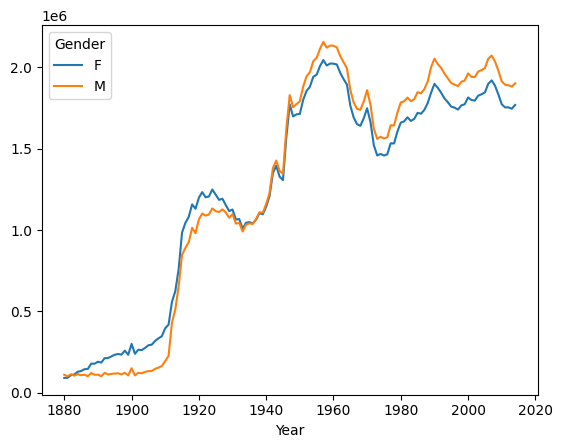

In [200]:
birth_by_year.plot()